In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
data=pd.read_csv('advertising.csv')

In [14]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [15]:
data.shape

(200, 4)

In [16]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [18]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='TV', ylabel='Sales'>

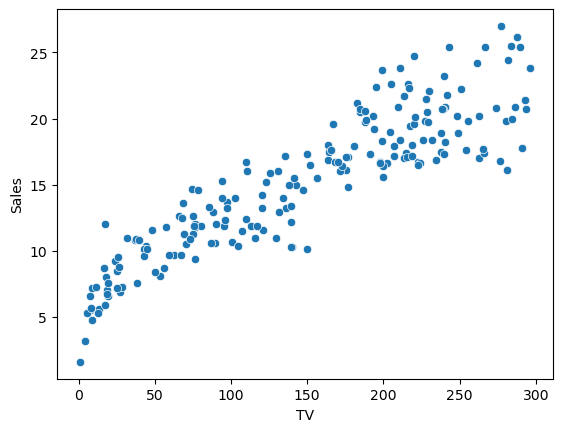

In [20]:
sns.scatterplot(x='TV',y='Sales',data=data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

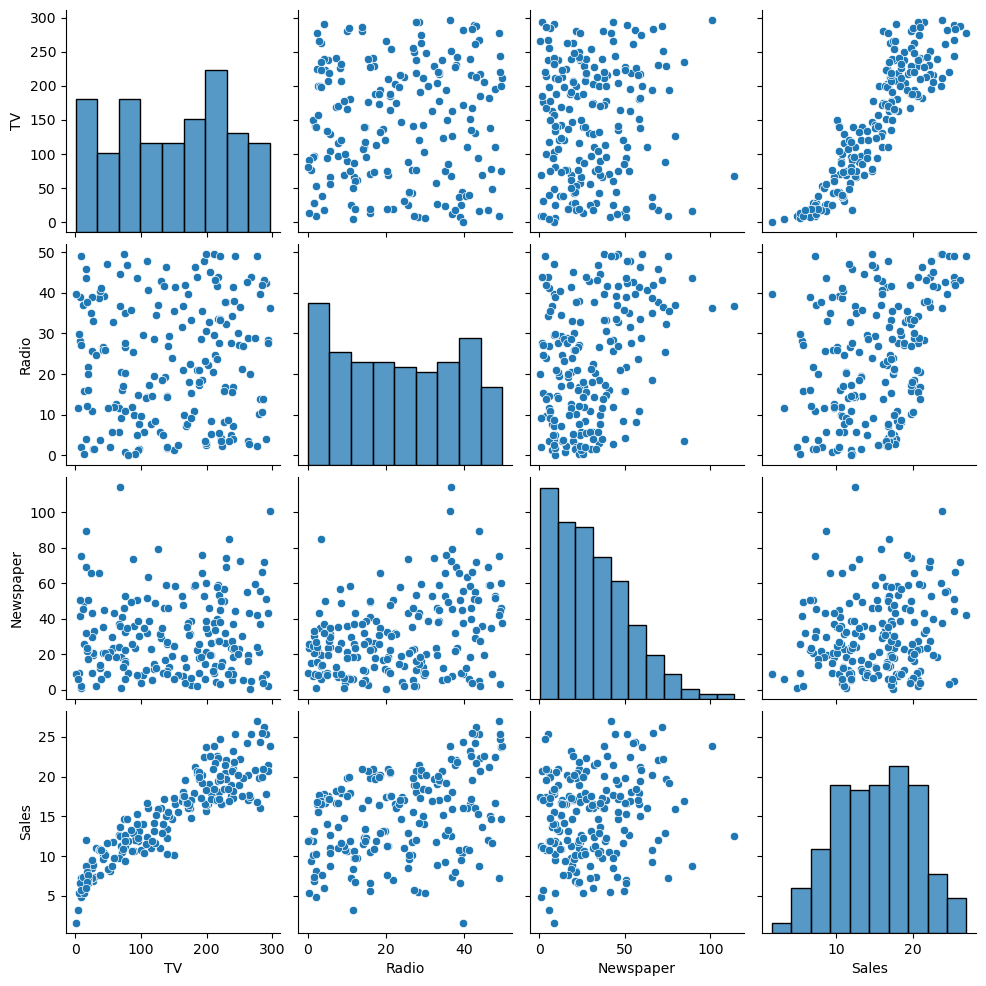

In [22]:
sns.pairplot(data[['TV','Radio','Newspaper','Sales']])
plt.subtitle("PAIRPLOT",y=1.02, size=16)
plt.show()

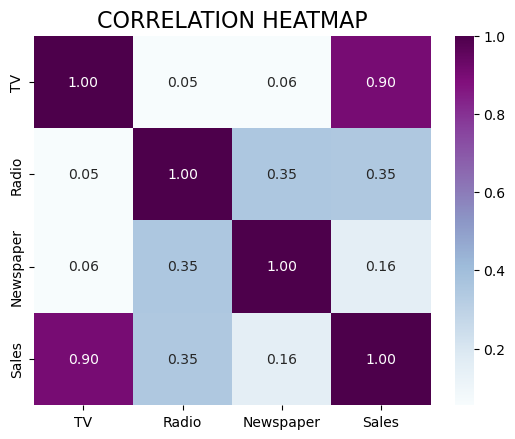

In [23]:
correlation_matrix =data[['TV','Radio','Newspaper','Sales']].corr()
sns.heatmap(correlation_matrix,annot=True, cmap='BuPu',fmt='.2f')
plt.title("CORRELATION HEATMAP",size=16)
plt.show()

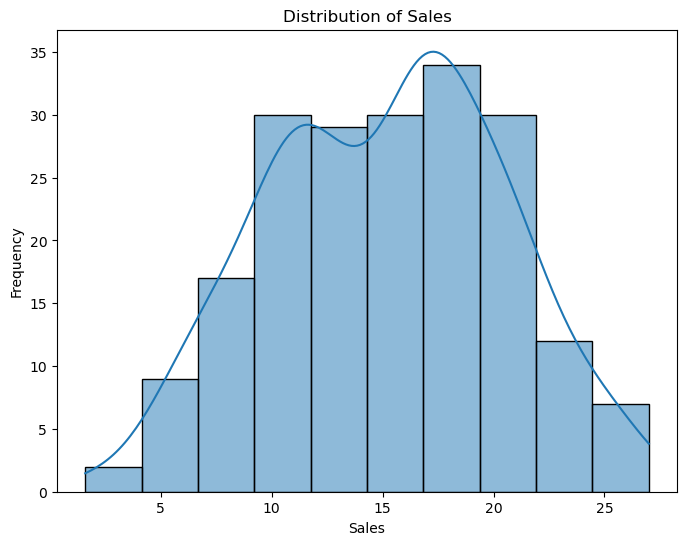

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'],kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

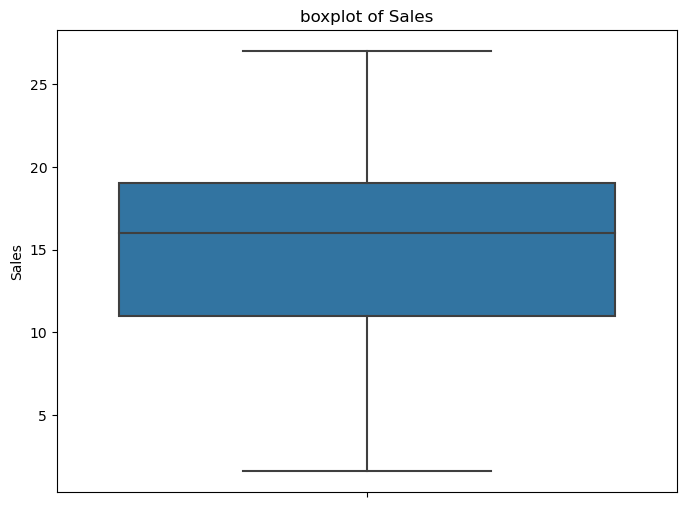

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Sales',data=data)
plt.title('boxplot of Sales')
plt.ylabel('Sales')
plt.show()

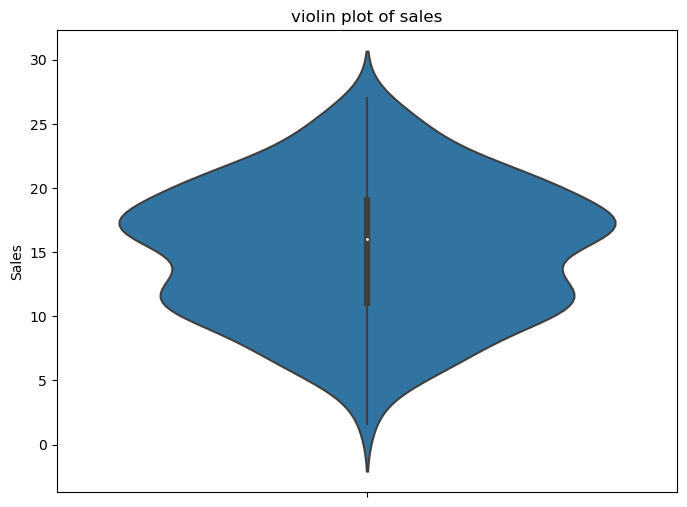

In [31]:
plt.figure(figsize=(8,6))
sns.violinplot(y='Sales',data=data)
plt.title('violin plot of sales')
plt.show()

In [33]:
print(data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [34]:
data['AdvertisingBudget']=data['TV']+ data['Radio']+ data['Newspaper']

In [35]:
print(data.head())

      TV  Radio  Newspaper  Sales  AdvertisingBudget
0  230.1   37.8       69.2   22.1              337.1
1   44.5   39.3       45.1   10.4              128.9
2   17.2   45.9       69.3   12.0              132.4
3  151.5   41.3       58.5   16.5              251.3
4  180.8   10.8       58.4   17.9              250.0


In [36]:
x=data[['TV','Radio','Newspaper','AdvertisingBudget']]
y=data['Sales']

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=42)

In [41]:
model=LinearRegression()
model.fit(x_train, y_train)




LinearRegression()

In [42]:
y_pred = model.predict(x_test)

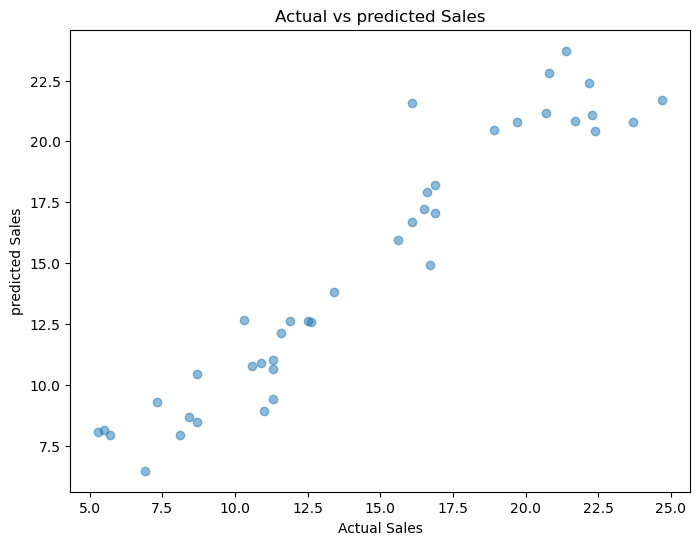

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("predicted Sales")
plt.title("Actual vs predicted Sales")
plt.show()